# Load Text

## Importing Dependencies

In [ ]:
import matplotlib.pyplot as plt

import collections
import pathlib

import tensorflow_text as tf_text
import tensorflow as tf

### Predict the tag for a Stack Overflow Question

In [ ]:
data_url = 'https://storage.googleapis.com/download.tensorflow.org/data/stack_overflow_16k.tar.gz'

dataset_dir = tf.keras.utils.get_file(
    origin=data_url,
    untar=True,
    cache_dir='stack_overflow',
    cache_subdir=''
)

dataset_dir = pathlib.Path(dataset_dir).parent

In [ ]:
list(dataset_dir.iterdir())

[PosixPath('/tmp/.keras/train'),
 PosixPath('/tmp/.keras/stack_overflow_16k.tar.gz'),
 PosixPath('/tmp/.keras/test'),
 PosixPath('/tmp/.keras/README.md')]

In [ ]:
train_dir = dataset_dir/'train'
list(train_dir.iterdir())

[PosixPath('/tmp/.keras/train/javascript'),
 PosixPath('/tmp/.keras/train/python'),
 PosixPath('/tmp/.keras/train/java'),
 PosixPath('/tmp/.keras/train/csharp')]

The `train/csharp`, `train/java`, `train/python` and `train/javascript `directories contain many text files, each of which is a Stack Overflow question.

In [ ]:
sample_file = train_dir/'python/1755.txt'

with open(sample_file) as f:
  print(f.read())

why does this blank program print true x=true.def stupid():.    x=false.stupid().print x



### Load the dataset
Next, you will load the data off-disk and prepare it into a format suitable for training.

In [ ]:
batch_size = 32
seed = 42

raw_train_ds = tf.keras.preprocessing.text_dataset_from_directory(
    train_dir,
    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    seed=seed
)

Found 8000 files belonging to 4 classes.
Using 6400 files for training.


In [ ]:
for text_batch, label_batch in raw_train_ds.take(1):
  for i in range(10):
    print("Question: ", text_batch.numpy()[i])
    print("Label:", label_batch.numpy()[i])

Question:  b'"my tester is going to the wrong constructor i am new to programming so if i ask a question that can be easily fixed, please forgive me. my program has a tester class with a main. when i send that to my regularpolygon class, it sends it to the wrong constructor. i have two constructors. 1 without perameters..public regularpolygon().    {.       mynumsides = 5;.       mysidelength = 30;.    }//end default constructor...and my second, with perameters. ..public regularpolygon(int numsides, double sidelength).    {.        mynumsides = numsides;.        mysidelength = sidelength;.    }// end constructor...in my tester class i have these two lines:..regularpolygon shape = new regularpolygon(numsides, sidelength);.        shape.menu();...numsides and sidelength were declared and initialized earlier in the testing class...so what i want to happen, is the tester class sends numsides and sidelength to the second constructor and use it in that class. but it only uses the default con

In [ ]:
raw_train_ds.class_names

['csharp', 'java', 'javascript', 'python']

In [ ]:
raw_val_ds = tf.keras.preprocessing.text_dataset_from_directory(
    train_dir,
    batch_size=batch_size,
    validation_split=0.2,
    subset='validation',
    seed=seed
)

Found 8000 files belonging to 4 classes.
Using 1600 files for validation.


In [ ]:
test_dir = dataset_dir/'test'

In [ ]:
raw_test_ds = tf.keras.utils.text_dataset_from_directory(
    test_dir,
    batch_size=batch_size
)

Found 8000 files belonging to 4 classes.


In [ ]:
raw_train_ds = raw_train_ds.cache().prefetch(buffer_size=tf.data. AUTOTUNE)
raw_val_ds = raw_val_ds.cache().prefetch(buffer_size=tf.data. AUTOTUNE)
raw_test_ds = raw_test_ds.cache().prefetch(buffer_size=tf.data. AUTOTUNE)

## Preprocessing the Data

We will build two models to learn more about standardization, tokenization, and vectorization with TextVectorization:

First, We will use the 'binary' vectorization mode to build a bag-of-words model.
Then, We will use the 'int' mode with a 1D ConvNet.

In [ ]:
VOCAB_SIZE = 10000

binary_vectorize_layer = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE,
    output_mode='binary'
)

In [ ]:
# For the 'int' mode, in addition to maximum vocabulary size,
# you need to set an explicit maximum sequence length (MAX_SEQUENCE_LENGTH),
# which will cause the layer to pad or truncate sequences to exactly output_sequence_length values

MAX_SEQUENCE_LENGTH = 250

int_vectorize_layer = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE,
    output_mode='int',
    output_sequence_length=MAX_SEQUENCE_LENGTH
)

Next, call TextVectorization.adapt to fit the state of the preprocessing layer to the dataset. This will cause the model to build an index of strings to integers.



In [ ]:
train_text = raw_train_ds.map(lambda text, labels: text)

In [ ]:
binary_vectorize_layer.adapt(train_text)

In [ ]:
int_vectorize_layer.adapt(train_text)

In [ ]:
# Retrieve a batch (of 32 reviews and labels) from the dataset.
text_batch, label_batch = next(iter(raw_train_ds))
first_question, first_label = text_batch[0], label_batch[0]
print("Question:", first_question)
print("Label:", first_label)

Question: tf.Tensor(b'"unit testing of setters and getters teacher wanted us to do a comprehensive unit test. for me, this will be the first time that i use junit. i am confused about testing set and get methods. do you think should i test them? if the answer is yes; is this code enough for testing?..  public void testsetandget(){.    int a = 10;.    class firstclass = new class();.    firstclass.setvalue(10);.    int value = firstclass.getvalue();.    assert.asserttrue(""error"", value==a);.  }...in my code, i think if there is an error, we can\'t know that the error is deriving because of setter or getter."\n', shape=(), dtype=string)
Label: tf.Tensor(1, shape=(), dtype=int32)


In [ ]:
print("'binary' vectorized question:",
      list(binary_vectorize_layer(first_question).numpy()))

'binary' vectorized question: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0,

In [ ]:
print("'int' vectorized question:",
      int_vectorize_layer(first_question).numpy())

'int' vectorized question: [1011  773    9 2456    8 1863 2362  690 1267    4   40    5    1 1011
  196   12   74   13   72   33    2   98  105   14    3   70 9611    3
   34  888  202  773  107    8   41  242   40   58  291   90    3  196
  191   10    2  182    6  668    6   13   30 1187   12  773   22   42
    1   28    5  140   29 5213   15   29    1   28   51    1    1    1
    7   23   30    3  291   10   67    6   32   65  185  166  102   14
    2   65    6    1  193    9 2784   45 2410    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0

In [ ]:
print("1289 ---> ", int_vectorize_layer.get_vocabulary()[1289])
print("313 ---> ", int_vectorize_layer.get_vocabulary()[313])
print("Vocabulary size: {}".format(len(int_vectorize_layer.get_vocabulary())))

1289 --->  roman
313 --->  source
Vocabulary size: 10000


## Train the Model
For the `binary` vectorized data, define a simple bag-of-words linear model, then configure and train it

In [ ]:
binary_model = tf.keras.Sequential([
    binary_vectorize_layer,
    tf.keras.layers.Dense(4)
])

In [ ]:
binary_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
bin_history = binary_model.fit(
    raw_train_ds,
    validation_data=raw_val_ds,
    epochs=10
)

Epoch 1/10
200/200 [==============================] - 2s 8ms/step - loss: 1.1302 - accuracy: 0.6409 - val_loss: 0.9230 - val_accuracy: 0.7775
Epoch 2/10
200/200 [==============================] - 1s 7ms/step - loss: 0.7830 - accuracy: 0.8172 - val_loss: 0.7559 - val_accuracy: 0.8000
Epoch 3/10
200/200 [==============================] - 2s 10ms/step - loss: 0.6299 - accuracy: 0.8627 - val_loss: 0.6687 - val_accuracy: 0.8138
Epoch 4/10
200/200 [==============================] - 2s 9ms/step - loss: 0.5358 - accuracy: 0.8859 - val_loss: 0.6143 - val_accuracy: 0.8263
Epoch 5/10
200/200 [==============================] - 1s 6ms/step - loss: 0.4695 - accuracy: 0.9033 - val_loss: 0.5769 - val_accuracy: 0.8319
Epoch 6/10
200/200 [==============================] - 1s 7ms/step - loss: 0.4190 - accuracy: 0.9170 - val_loss: 0.5498 - val_accuracy: 0.8369
Epoch 7/10
200/200 [==============================] - 1s 6ms/step - loss: 0.3786 - accuracy: 0.9267 - val_loss: 0.5294 - val_accuracy: 0.8363
Epoch

Next, you will use the 'int' vectorized layer to build a 1D Convolutional Neural Network

In [ ]:
int_model = tf.keras.Sequential([
    int_vectorize_layer,
   tf. keras.layers.Embedding(VOCAB_SIZE + 1, 64, mask_zero=True),
   tf. keras.layers.Dropout(0.5),
   tf. keras.layers.Conv1D(64, 5, padding='valid', activation='relu', strides=2),
   tf. keras.layers.GlobalMaxPooling1D(),
   tf. keras.layers.Dense(4)
])

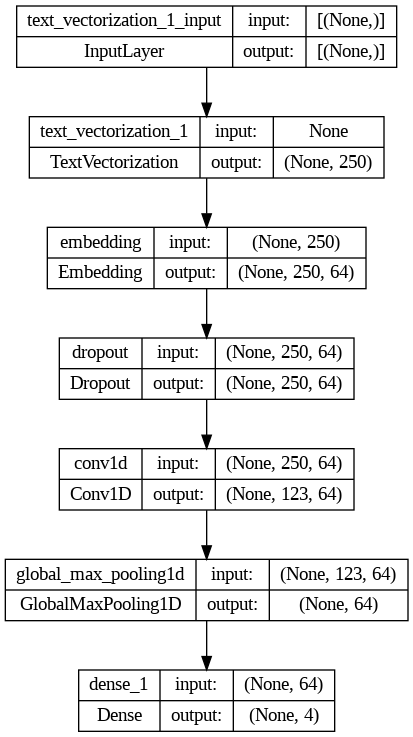

In [ ]:
tf.keras.utils.plot_model(int_model,  show_shapes=True)

In [ ]:
int_model.compile(
     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
int_history = int_model.fit(raw_train_ds, validation_data=raw_val_ds, epochs=10)

Epoch 1/10
200/200 [==============================] - 9s 42ms/step - loss: 1.2717 - accuracy: 0.4116 - val_loss: 1.0010 - val_accuracy: 0.6025
Epoch 2/10
200/200 [==============================] - 8s 40ms/step - loss: 0.8257 - accuracy: 0.6484 - val_loss: 0.6532 - val_accuracy: 0.7406
Epoch 3/10
200/200 [==============================] - 8s 38ms/step - loss: 0.5813 - accuracy: 0.7739 - val_loss: 0.5500 - val_accuracy: 0.7856
Epoch 4/10
200/200 [==============================] - 9s 43ms/step - loss: 0.4300 - accuracy: 0.8523 - val_loss: 0.4991 - val_accuracy: 0.8094
Epoch 5/10
200/200 [==============================] - 6s 32ms/step - loss: 0.3113 - accuracy: 0.9020 - val_loss: 0.4814 - val_accuracy: 0.8062
Epoch 6/10
200/200 [==============================] - 8s 40ms/step - loss: 0.2214 - accuracy: 0.9359 - val_loss: 0.4936 - val_accuracy: 0.8106
Epoch 7/10
200/200 [==============================] - 6s 32ms/step - loss: 0.1605 - accuracy: 0.9556 - val_loss: 0.5171 - val_accuracy: 0.8131

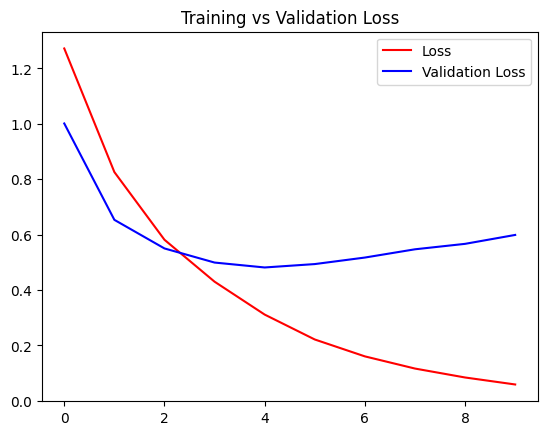

In [ ]:
fig = plt.figure()
plt.plot(int_history.history["loss"],  color='red', label='Loss')
plt.plot(int_history.history["val_loss"], color='blue', label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training vs Validation Loss')
plt.show()


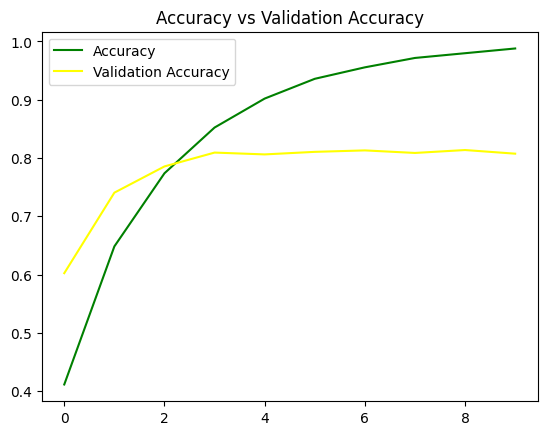

In [ ]:
fig = plt.figure()

plt.plot(int_history.history["accuracy"], color='green', label='Accuracy')
plt.plot(int_history.history["val_accuracy"], color='yellow', label='Validation Accuracy')
plt.title('Accuracy vs Validation Accuracy')
plt.legend(loc='upper left')
plt.show()

You are nearly ready to train your model.

As a final preprocessing step, you will apply the TextVectorization layers you created earlier to the training, validation, and test sets

In [ ]:
binary_train_ds = raw_train_ds.map(lambda x,y: (binary_vectorize_layer(x), y))
binary_val_ds = raw_val_ds.map(lambda x,y: (binary_vectorize_layer(x), y))
binary_test_ds = raw_test_ds.map(lambda x,y: (binary_vectorize_layer(x), y))

int_train_ds = raw_train_ds.map(lambda x,y: (int_vectorize_layer(x), y))
int_val_ds = raw_val_ds.map(lambda x,y: (int_vectorize_layer(x), y))
int_test_ds = raw_test_ds.map(lambda x,y: (int_vectorize_layer(x), y))

In [ ]:
predictions = binary_model.predict(['let number = 10 '])

1/1 [==============================] - 0s 59ms/step


In [ ]:
predictions = tf.cast(predictions, dtype=tf.float32)
predictions = tf.math.softmax(predictions, axis=-1)
predictions.numpy() # ['csharp', 'java', 'javascript', 'python']

array([[0.18631083, 0.20862329, 0.40560564, 0.19946016]], dtype=float32)